In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute  import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
c = pd.read_csv("c.csv")
l = pd.read_csv("l.csv")

In [3]:
c.dropna(subset=['CDR'],inplace=True)
# c.drop(columns=['ID','Delay'],inplace=True)
l= l.rename(columns={'EDUC':'Educ'})
l.drop(columns=['Subject ID','MRI ID','Group','Visit','MR Delay'],inplace=True)

In [4]:
c['Educ'] = MinMaxScaler().fit_transform(np.array(c['Educ']).reshape(-1,1))
l['Educ'] = MinMaxScaler().fit_transform(np.array(l['Educ']).reshape(-1,1))

In [5]:
data = pd.concat([c,l])

In [6]:
data.iloc[:,0]=data.iloc[:,0].map({'F':0, 'M':1})
data.iloc[:,1]=data.iloc[:,1].map({'L':0, 'R':1})

#Right -> 1
#Left - > 0

#Male -> 1
#Female -> 0

In [7]:
imputer = SimpleImputer (missing_values = np.nan,strategy='most_frequent')

imputer.fit(data[['SES']])
data[['SES']] = imputer.fit_transform(data[['SES']])

imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(data[['MMSE']])
data[['MMSE']] = imputer.fit_transform(data[['MMSE']])

In [8]:
le = preprocessing.LabelEncoder()
data['CDR'] = le.fit_transform(data['CDR'].values)

In [9]:
# plt.bar(data['CDR'].unique(),data['CDR'].value_counts())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     608 non-null    int64  
 1   Hand    608 non-null    int64  
 2   Age     608 non-null    int64  
 3   Educ    608 non-null    float64
 4   SES     608 non-null    float64
 5   MMSE    608 non-null    float64
 6   CDR     608 non-null    int64  
 7   eTIV    608 non-null    int64  
 8   nWBV    608 non-null    float64
 9   ASF     608 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 52.2 KB


In [11]:
data[['SES','MMSE']] = data[['SES','MMSE']].astype(int)
data.dtypes

M/F       int64
Hand      int64
Age       int64
Educ    float64
SES       int32
MMSE      int32
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

In [12]:
data.describe()

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,608.000000,608.0,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.00000,608.000000
mean,0.393092,1.0,75.208882,0.520801,2.442434,27.240132,0.569079,1477.062500,0.73713,1.203597
std,0.488839,0.0,9.865026,0.243613,1.098138,3.683290,0.722775,170.653795,0.04267,0.135091
min,0.000000,1.0,33.000000,0.000000,1.000000,4.000000,0.000000,1106.000000,0.64400,0.876000
25%,0.000000,1.0,70.000000,0.352941,2.000000,26.000000,0.000000,1352.500000,0.70400,1.118000
50%,0.000000,1.0,76.000000,0.500000,2.000000,29.000000,0.000000,1460.000000,0.73600,1.202000
75%,1.000000,1.0,82.000000,0.705882,3.000000,30.000000,1.000000,1569.000000,0.76625,1.297500
max,1.000000,1.0,98.000000,1.000000,5.000000,30.000000,3.000000,2004.000000,0.84700,1.587000


In [13]:
y = data.iloc[:,6]
x = data.iloc[:,[0,1,2,3,4,5,7,8,9]]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42,test_size=0.3)

In [15]:
clfrf = RandomForestClassifier() 
clfrf.fit(X_train, y_train)
y_pred_rf = clfrf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8032786885245902

In [16]:
data.head()

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,74,0.25,3,29,0,1344,0.743,1.306
1,0,1,55,0.75,1,29,0,1147,0.810,1.531
2,0,1,73,0.75,3,27,1,1454,0.708,1.207
8,1,1,74,1.00,2,30,0,1636,0.689,1.073
9,0,1,52,0.50,2,30,0,1321,0.827,1.329


In [17]:
print(clfrf.predict(([[0,1,62,0.75,2,29,1334,0.743,1.306]])))

[0]


C:\Users\obaid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
data['CDR'].unique()

array([0, 1, 2, 3], dtype=int64)

In [19]:
# data.loc[data['CDR']==0]

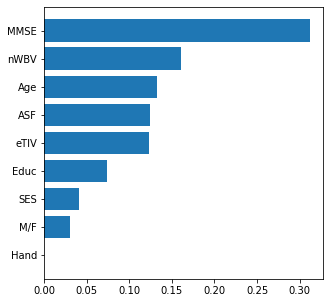

In [20]:
rf = RandomForestClassifier(n_estimators=250)

rf.fit(x,y)

f_i = list(zip(x,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.gcf().set_size_inches(5,5)

plt.show()

#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX#

In [21]:
# x1=input()
# x2=input()
# x3=input()
# x4=input()
# x5=input()
# x6=input()
# x7=input()
# x8=input()
# x9=input()

In [22]:
# arr=[[x1,x2,x3,x4,x5,x6,x7,x8,x9]]
# arr

In [23]:
# print(clfrf.predict(arr))

In [29]:
data.loc[data["CDR"]==3]

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
278,0,1,78,0.500000,3,15,3,1401,0.703,1.253
317,1,1,86,0.000000,4,15,3,1512,0.665,1.161
184,0,1,98,0.647059,1,21,3,1503,0.660,1.168
251,0,1,78,0.470588,3,15,3,1401,0.700,1.253
330,1,1,79,0.823529,1,25,3,1710,0.760,1.026


In [25]:
np.sort(data['MMSE'].unique())

array([ 4,  7, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30])